In [2]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

from pydd.binary import *

In [3]:
# Intrinsic parameters of astrophysical benchmark
m1 = 1e3 * MSUN
m2 = 1 * MSUN
rho_6 = 0.5e16 * MSUN / PC ** 3
gamma_s = 7 / 3

# Extrinsic parameters
Phi_c = 0.0  # GW phase at coalescence
t_c = 0.0  # reference time at coalescence
dL = 1e8 * PC  # distance
iota = 0.0  # inclination angle

# Construct dark dress and vacuum system. These functions set up (almost all)
# the intermediate variables.
rho_s = get_rho_s(rho_6, m1, gamma_s)
dd = make_dynamic_dress(m1, m2, rho_s, gamma_s, Phi_c, t_c, dL, iota)
vb = make_vacuum_binary(m1, m2, Phi_c, t_c, dL, iota)

# Get frequency 5 yr before coalescence (first time is slow due to jit)
t_obs_lisa = 5 * YR
f_l = root_scalar(
    lambda f: t_to_c(f, dd) - t_obs_lisa,
    bracket=(1e-3, 1e-1),
    rtol=1e-15,
    xtol=1e-100,
).root

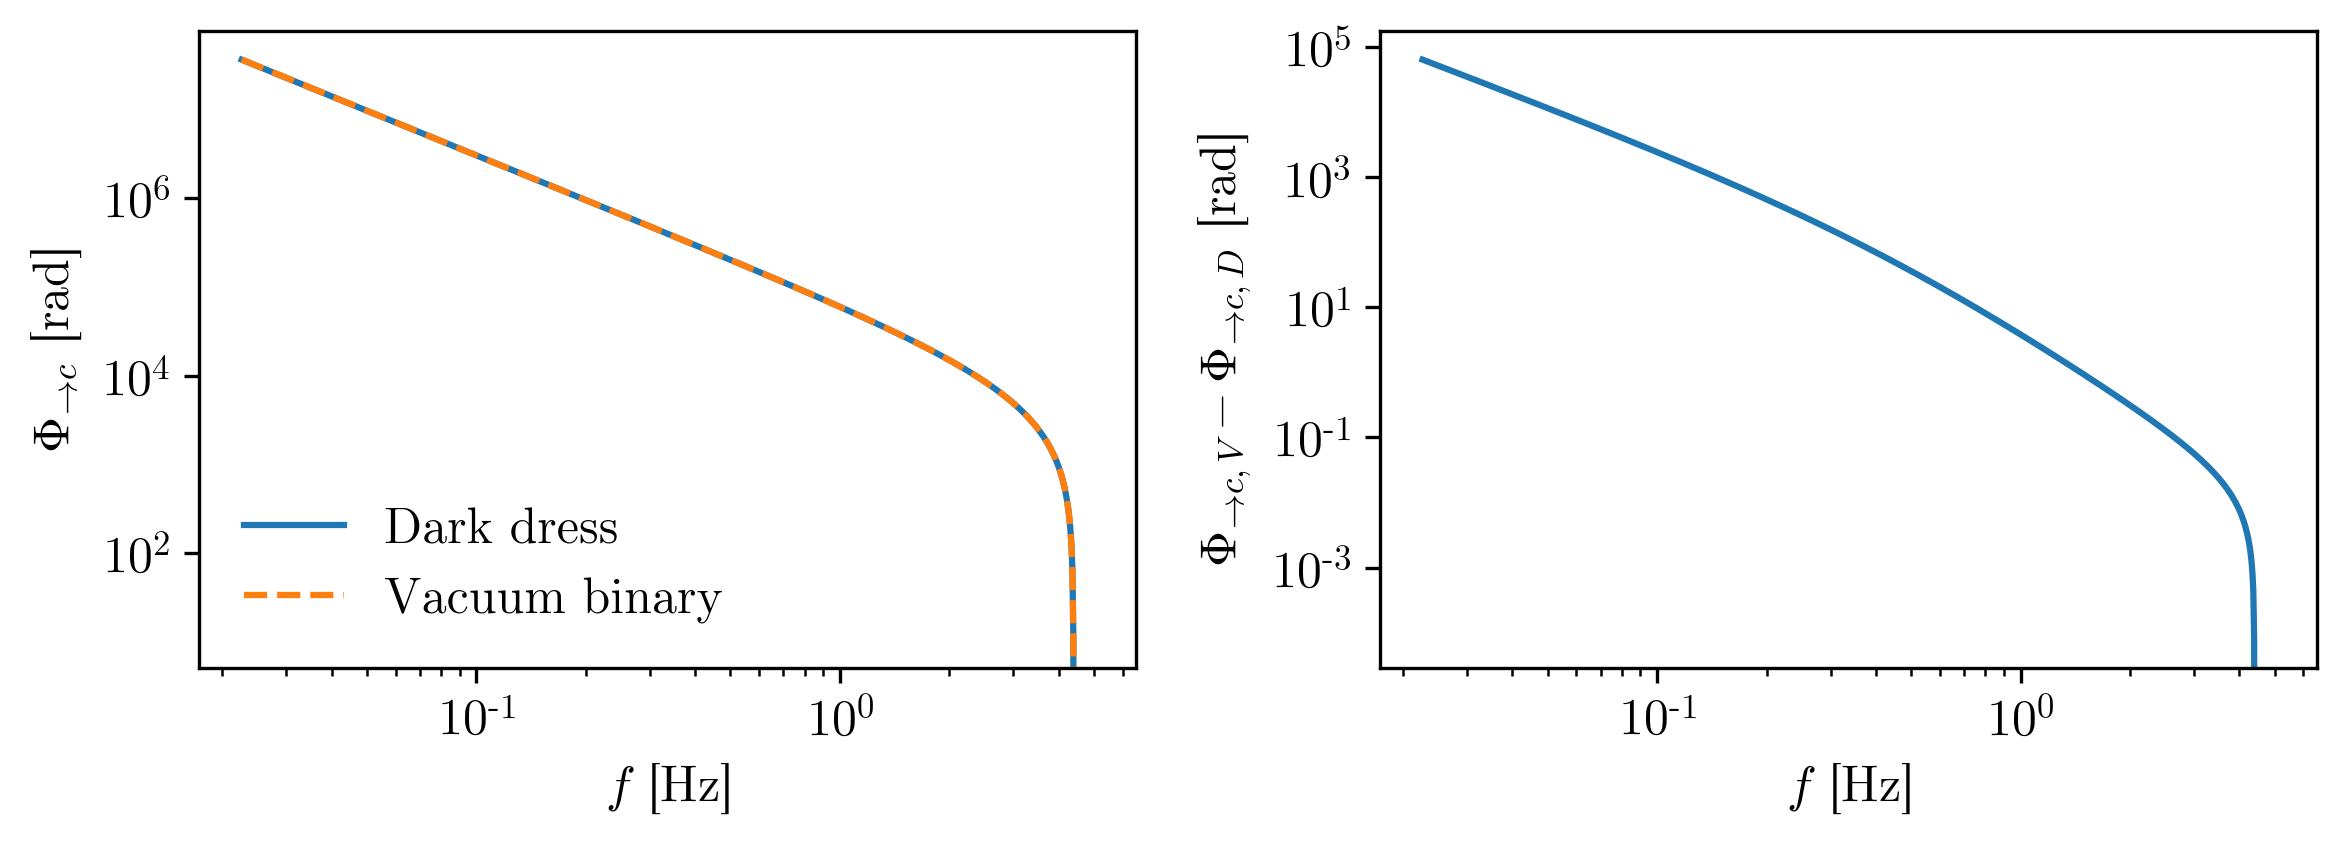

In [5]:
plt.figure(figsize=(8, 3))

plt.subplot(1, 2, 1)
fs = jnp.geomspace(f_l, 5, 1000)
plt.loglog(fs, Phi_to_c(fs, dd), label="Dark dress")
plt.loglog(fs, Phi_to_c(fs, vb), "--", label="Vacuum binary")
plt.xlabel(r"$f$ [Hz]")
plt.ylabel(r"$\Phi_{\to c}$ [rad]")
plt.legend(frameon=False)

plt.subplot(1, 2, 2)
fs = jnp.geomspace(f_l, 5, 1000)
plt.loglog(fs, Phi_to_c(fs, vb) - Phi_to_c(fs, dd))
plt.xlabel(r"$f$ [Hz]")
plt.ylabel(r"$\Phi_{\to c,V} - \Phi_{\to c,D}$ [rad]")

plt.tight_layout()